In [24]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
%cd /content/drive/MyDrive/Twitter/

/content/drive/MyDrive/Twitter


In [26]:
!pip install unidecode

In [27]:
import nltk
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt 
import seaborn as sb
from nltk.corpus import stopwords
import warnings 
warnings.filterwarnings("ignore")
import unidecode
from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer 
nltk.download('wordnet')
from nltk.stem import PorterStemmer
nltk.download('punkt')
from nltk.tokenize import word_tokenize 
import matplotlib.animation as animation
import operator
from collections import Counter
nltk.download('stopwords')
%matplotlib inline

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [39]:
df = pd.read_csv('test1.csv')
df

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


In [40]:
# to remove @
df['clean_tweet'] = df['tweet'].apply(lambda x : ' '.join([tweet for tweet in x.split()if not tweet.startswith("@")]))
#Removing numbers
df['clean_tweet'] = df['clean_tweet'].apply(lambda x : ' '.join([tweet for tweet in x.split() if not tweet == '\d*']))
#Removing greek characters 
df['clean_tweet'] = df['clean_tweet'].apply(lambda x : ' '.join([unidecode.unidecode(word) for word in x.split()])) 
#Removing 'hmm' and it's variants
df['clean_tweet'] = df['clean_tweet'].apply(lambda x : ' '.join([word for word in x.split() if not word == 'h(m)+' ]))

In [41]:
#removing slang words
d = {'luv':'love','wud':'would','lyk':'like','wateva':'whatever','ttyl':'talk to you later',
               'kul':'cool','fyn':'fine','omg':'oh my god!','fam':'family','bruh':'brother',
               'cud':'could','fud':'food'} ## Need a huge dictionary
words = "I luv myself"
words = words.split()
reformed = [d[word] if word in d else word for word in words]
reformed = " ".join(reformed)

In [42]:
df['clean_tweet'] = df['clean_tweet'].apply(lambda x : ' '.join(d[word] if word in d else word for word in x.split()))

In [43]:
#Removing stopwords
df['clean_tweet'] = df['clean_tweet'].apply(lambda x : ' '.join([word for word in x.split() if not word in set(stopwords.words('english'))]))

In [44]:
#Lemmitization
lemmatizer = WordNetLemmatizer()
df['clean_tweet'] = df['clean_tweet'].apply(lambda x : ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))

In [45]:
#Stemming
ps = PorterStemmer()
adwait = df
#adwait.head()
df['clean_tweet'] = df['clean_tweet'].apply(lambda x : ' '.join([ps.stem(word) for word in x.split()]))

In [46]:
#Tokenization
corpus = []
for i in range(0,len(df)):
    tweet = df['clean_tweet'][i]
    tweet = tweet.lower()
    tweet = tweet.split()
    tweet = [ps.stem(word) for word in tweet if not word in set(stopwords.words('english'))]
    tweet = ' '.join(tweet)
    corpus.append(tweet)

normal words


(-0.5, 799.5, 499.5, -0.5)

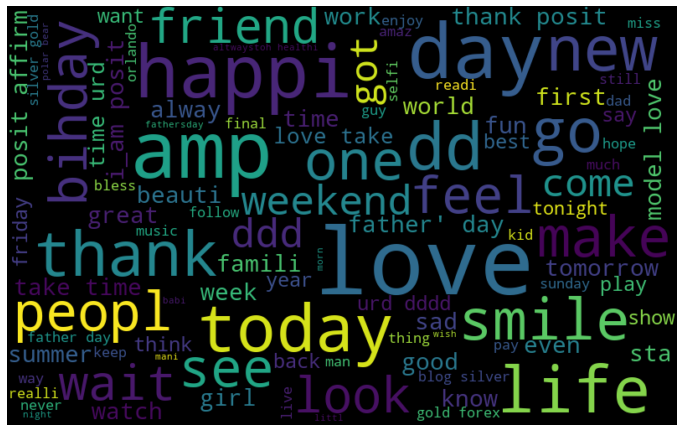

In [17]:
normal_words = ' '.join([word for word in df['clean_tweet'][df['label'] == 0]])
wordcloud = WordCloud(width = 800, height = 500, max_font_size = 110,max_words = 100).generate(normal_words)
print('normal words')
plt.figure(figsize= (12,8))
plt.imshow(wordcloud, interpolation = 'bilinear',cmap='viridis')
plt.axis('off')

hate words


(-0.5, 799.5, 499.5, -0.5)

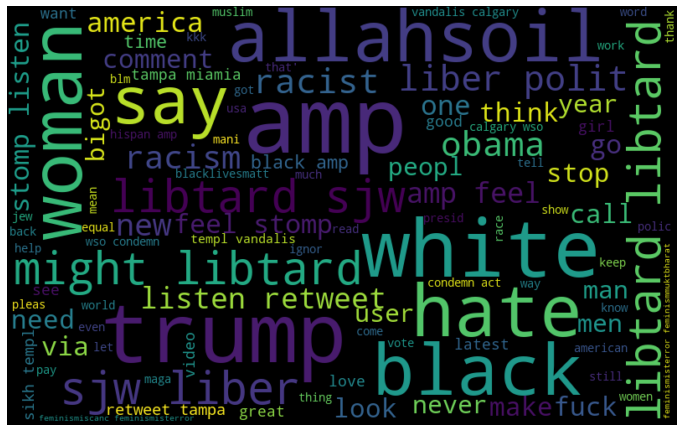

In [18]:
hate_words = ' '.join([word for word in df['clean_tweet'][df['label'] == 1]])
wordcloud = WordCloud(width = 800, height = 500, max_font_size = 110,max_words = 100).generate(hate_words)
print('hate words')
plt.figure(figsize= (12,8))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')

## ML Models

In [34]:
#TF-IDF approach
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2,stop_words='english')
# TF-IDF feature matrix
X1 = tfidf_vectorizer.fit_transform(corpus).toarray()
Y1 = df.loc[:,'label'].values

In [35]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, Y1_train, Y1_test = train_test_split(df['clean_tweet'], df['label'], test_size = 0.3, random_state=0, shuffle = True, stratify=df['label'])
vectorizer = TfidfVectorizer()
X1_train_vect = vectorizer.fit_transform(X1_train)
Y1 = df.loc[:,'label'].values

In [48]:
#Random Forest using pipelines
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
random_forest = Pipeline([('tfidf', TfidfVectorizer()), ('random_forest', RandomForestClassifier())])
random_forest.fit(X1_train, Y1_train)
y_pred = random_forest.predict(X1_test)
print(pd.crosstab(Y1_test,y_pred,rownames=['Actual'],colnames=['Predicted']))
print(classification_report(Y1_test, y_pred))
print("Accuracy",accuracy_score(Y1_test, y_pred))
rf_accuracy = accuracy_score(Y1_test, y_pred)

Predicted     0    1
Actual              
0          8891   25
1           333  340
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      8916
           1       0.93      0.51      0.66       673

    accuracy                           0.96      9589
   macro avg       0.95      0.75      0.82      9589
weighted avg       0.96      0.96      0.96      9589

Accuracy 0.9626655542809469


In [49]:
# decision tree classifier
from sklearn import tree
decision_tree_clf = Pipeline([('tfidf', TfidfVectorizer()), ('dct', tree.DecisionTreeClassifier())])
decision_tree_clf.fit(X1_train, Y1_train)
predict_dt = decision_tree_clf.predict(X1_test)
print(classification_report(Y1_test, predict_dt))
print("Accuracy",accuracy_score(Y1_test, predict_dt))
dt_accuracy=accuracy_score(Y1_test, predict_dt)

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      8916
           1       0.63      0.59      0.61       673

    accuracy                           0.95      9589
   macro avg       0.80      0.78      0.79      9589
weighted avg       0.95      0.95      0.95      9589

Accuracy 0.9469183439357597


In [50]:
from sklearn.ensemble import GradientBoostingClassifier
grad_boost_clf = Pipeline([('tfidf', TfidfVectorizer()), ('gbc', GradientBoostingClassifier())]) 
grad_boost_clf.fit(X1_train, Y1_train)
predict_grad = grad_boost_clf.predict(X1_test)
print(classification_report(Y1_test, predict_grad))
print("Accuracy",accuracy_score(Y1_test, predict_grad))
gb_accuracy = accuracy_score(Y1_test, predict_dt)

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      8916
           1       0.93      0.28      0.43       673

    accuracy                           0.95      9589
   macro avg       0.94      0.64      0.70      9589
weighted avg       0.95      0.95      0.93      9589

Accuracy 0.9479612055480238


Text(0.5, 1.0, 'Accuracy Bar')

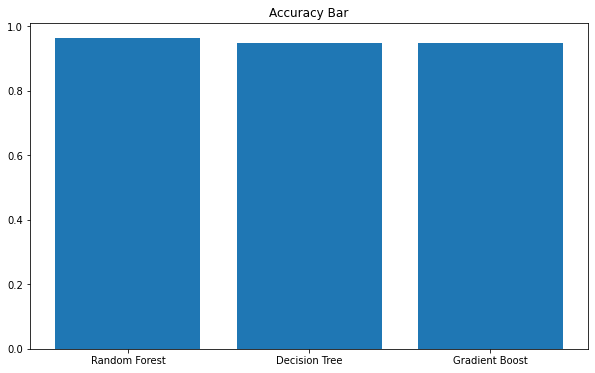

In [53]:
x = ['Random Forest', 'Decision Tree', 'Gradient Boost']
y = [rf_accuracy, dt_accuracy, gb_accuracy]

plt.figure(figsize=(10,6))
plt.bar(x, y)
plt.title('Accuracy Bar')